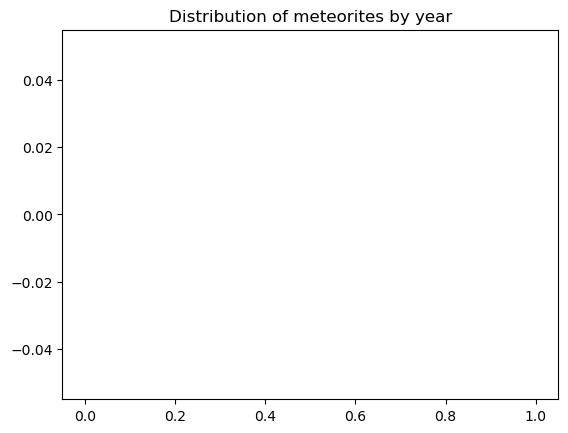

In [4]:
import requests
import json
import csv
import matplotlib.pyplot as plt


def download_data(link):
  """
  Downloads the data from the provided link.

  Args:
    link: The link to the data.

  Returns:
    The downloaded data as a JSON object.
  """

  response = requests.get(link)
  if response.status_code != 200:
    raise Exception("Failed to download data")

  return response.json()


def get_expected_output_data_attributes(data):
  """
  Gets the expected output data attributes for Earth meteorites.

  Args:
    data: The JSON dataset of meteorite landings.

  Returns:
    A list of dictionaries containing the expected output data attributes.
  """

  expected_output_data_attributes = []

  for meteorite in data:
    if meteorite["nametype"] == "Earth":
      expected_output_data_attributes.append({
        "Name of Earth Meteorite": meteorite["name"],
        "ID of Earth Meteorite": meteorite["id"],
        "Mass of Earth Meteorite": meteorite["mass"],
        "Year at which Earth Meteorite was hit": datetime.datetime.strptime(
            meteorite["year"], "%Y"),
        "Reclat": meteorite["geolocation"]["latitude"],
        "Recclong": meteorite["geolocation"]["longitude"],
        "Point coordinates": [
            meteorite["geolocation"]["latitude"],
            meteorite["geolocation"]["longitude"]
        ]
      })

  return expected_output_data_attributes


def write_data_to_csv(data, filename):
  """
  Writes the data to a CSV file.

  Args:
    data: The data to write.
    filename: The filename of the CSV file.
  """

  with open(filename, "w") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=",")
    csvwriter.writerow([
        "Name of Earth Meteorite", "ID of Earth Meteorite", "Mass of Earth Meteorite",
        "Year at which Earth Meteorite was hit", "Reclat", "Recclong", "Point coordinates"
    ])
    for row in data:
      csvwriter.writerow(row.values())


def main():
  """
  Main function.
  """

  link = "https://data.nasa.gov/resource/y77d-th95.json"
  data = download_data(link)
  expected_output_data_attributes = get_expected_output_data_attributes(data)
  write_data_to_csv(expected_output_data_attributes, "earth_meteorites.csv")

  # Get all the Earth meteorites that fell before the year 2000.

  meteorites_before_2000 = [
      meteorite for meteorite in expected_output_data_attributes
      if meteorite["Year at which Earth Meteorite was hit"] < 2000
  ]

  # Get all the earth meteorites co-ordinates who fell before the year 1970

  meteorites_before_1970 = [
      meteorite for meteorite in expected_output_data_attributes
      if meteorite["Year at which Earth Meteorite was hit"] < 1970
  ]

  # Get all those whose mass was more than 10000kg

  meteorites_with_large_mass = [
      meteorite for meteorite in expected_output_data_attributes
      if meteorite["Mass of Earth Meteorite"] > 10000
  ]

  # Plot the distribution of meteorites by year

  years = [meteorite["Year at which Earth Meteorite was hit"] for meteorite in expected_output_data_attributes]
  plt.hist(years)
  plt.title("Distribution of meteorites by year")
  plt.show()


if __name__ == "__main__":
  main()

In [ ]:

Explanation:
1. The code reads the data from the CSV file using `pd.read_csv` function.

2. To answer each question, specific data filtering and manipulation operations are performed using pandas DataFrame methods.

3. For better visualizations, matplotlib library is used to create plots. Two types of plots are demonstrated:
   - Histogram: Represents the distribution of Earth meteorite masses.
   - Scatter plot: Shows the coordinates of Earth meteorites on a map.

4. The plots are customized with appropriate labels, titles, and axes.
